In [2]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=08c5753bdf9898e3debef3f5332fad57b917337828783d228119241227c1fab6
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [6]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [7]:
keywords=['KDRT']
start="2022–10–06"
end ="2022–10–16"
max_num=10
fname='tweet.json' 
languages=['id','en']

In [8]:
import pandas as pd
datatw=[]

In [9]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [10]:
datatw

['@CiervoTrader @CiervoOfficial https://t.co/D8r2AK2xCG',
 'Farhat Abbas Sindir Lesti Kejora Soal KDRT #RCTIPlusAda\n\nhttps://t.co/J6RLORqrPv https://t.co/wnUXvPlKTP',
 '@__kimbora__ Ga sampe gitu sih 😭😭😭 ga mau drama kdrt ah',
 'Alhamdulillah selesai nyuci',
 'Denny Sumargo Ikut Berkomentar Soal Lesti Cabut Laporan KDRT: Orang Tuh Kepengennya Bukan Dicabut Laporannya https://t.co/N3T7GHcqhT https://t.co/9Hu0iXpNUV',
 '@achzam_prabu Bener..\nKeuangan akan merosot, KDRT bisa terjadi.',
 'Masker Wajah Bioaqua \nRp 1.999\nKlik link dibawah 👇\nhttps://t.co/axW30fnuBb\nFabio KDRT London Aipda HR\n#PerempuanDesa #ByeGubernurNgibul #IndonesiaMemanggil https://t.co/funozbrfhe',
 'KINI! Lesti Kejora Dapat Julukan RATU DRAMA Usai Damai Dengan Rizky Billar https://t.co/raw0IGxUsp via @YouTube Fabio Tiara KDRT Aipda HR ANTI PLAGIARISM MOVEMENT Marc Ahok Bogum Xi Jinping #PerempuanDesa #IkatanCintaEp913 #MotoGP #AniesEnd THANK YOU BTS Pecco Donghae https://t.co/QHFBZlwVmT']

In [11]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.3 MB/s 


In [12]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [13]:
documents_clean[0:5]

['ciervotrader ciervoofficial https t co drakxcg',
 'farhat abbas sindir lesti kejora soal kdrt rctiplusada https t co jrlorqrpv https t co wnuxvplktp',
 'kimbora ga sampe gitu sih ga mau drama kdrt ah',
 'alhamdulillah selesai nyuci',
 'denny sumargo ikut komentar soal lesti cabut lapor kdrt orang tuh ken bukan cabut lapor https t co ntghcqht https t co huixpnuv']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

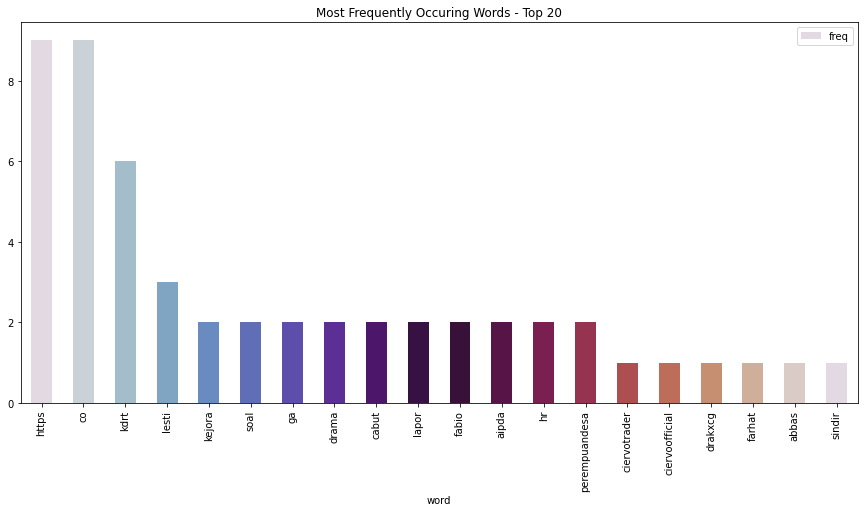

In [15]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [16]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [17]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 https
 co
 kdrt
 fabio
 kejora
 perempuandesa
 hr
 aipda
 lesti
 you
Cluster 1:
 kdrt
 ga
 ciervoofficial
 sampe
 kimbora
 https
 gitu
 drama
 mau
 merosot
Cluster 2:
 co
 https
 lapor
 cabut
 bukan
 kdrt
 ikut
 huixpnuv
 komentar
 lesti




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


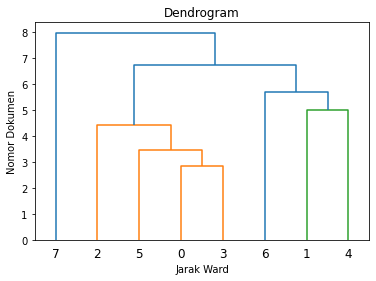

In [18]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

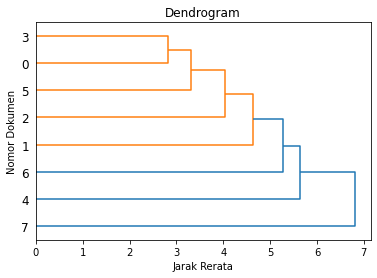

In [19]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()